In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['Hiragino Sans', 'MS Gothic']

play_info = pd.read_csv('play_info.csv', encoding='cp932', on_bad_lines='skip', engine='python')
print(play_info.shape)


(254361, 208)


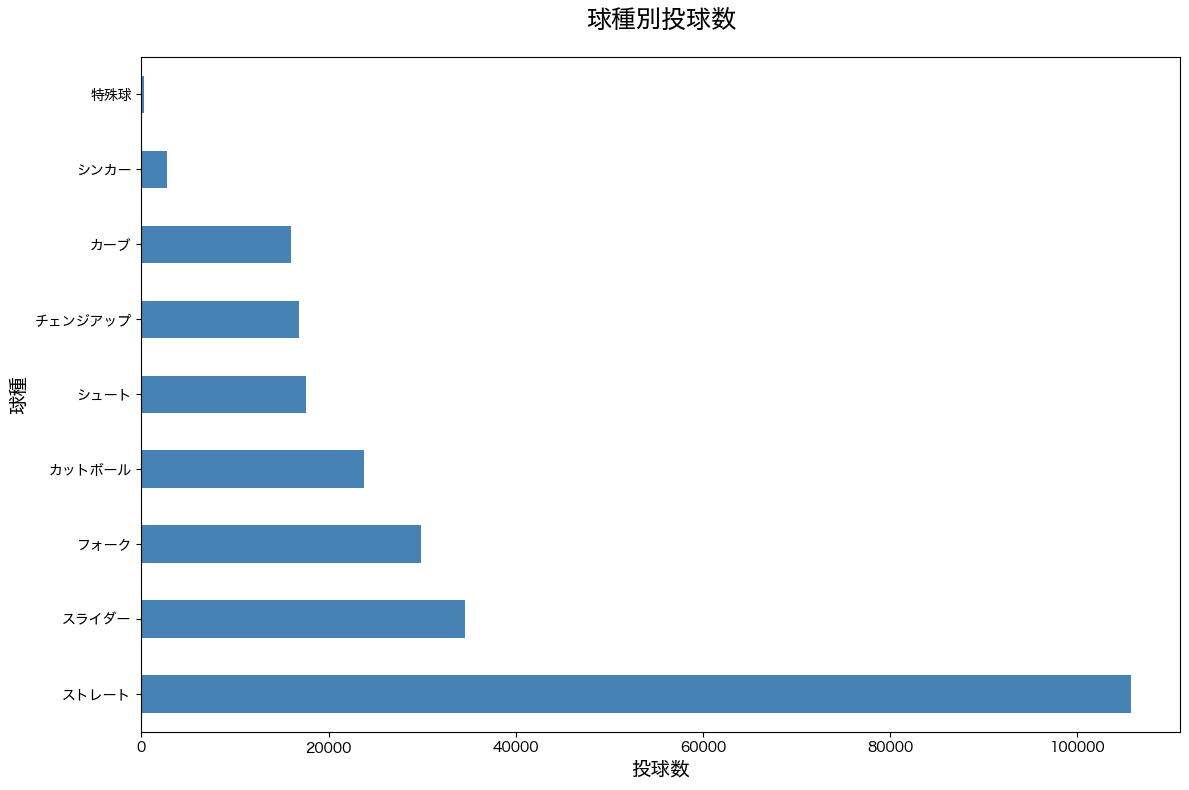

pitch_type_name
ストレート      105685
スライダー       34569
フォーク        29848
カットボール      23831
シュート        17585
チェンジアップ     16878
カーブ         15985
シンカー         2750
特殊球           268
Name: count, dtype: int64


In [4]:
pitch_count = play_info['pitch_type_name'].value_counts().head(15)

plt.figure(figsize=(12,8))
pitch_count.plot(kind='barh', color='steelblue')
plt.title('球種別投球数', fontsize=18, pad=20)
plt.xlabel('投球数', fontsize=14)
plt.ylabel('球種', fontsize=14)
plt.tight_layout()
plt.show()

print(pitch_count)


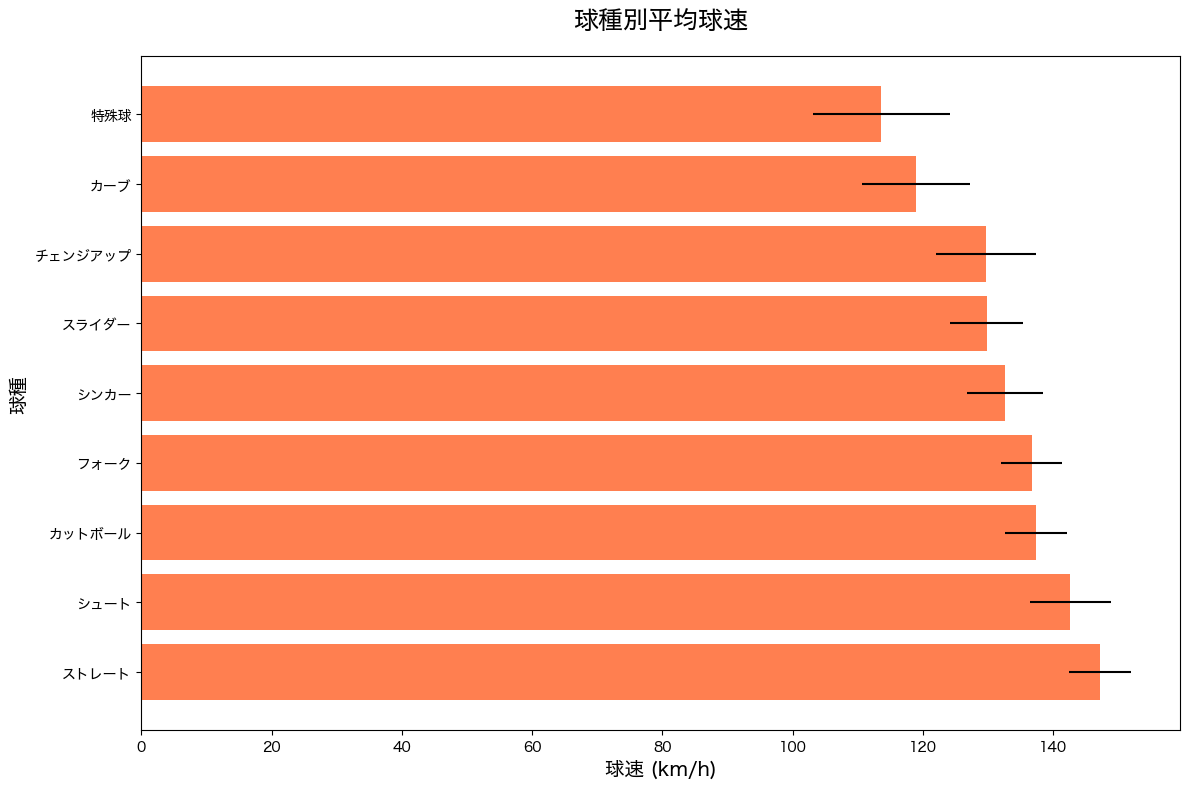

                       mean        std  count
pitch_type_name                              
ストレート            147.118685   4.742569  98075
シュート             142.641631   6.245859  15964
カットボール           137.391962   4.787647  22020
フォーク             136.707883   4.685978  27376
シンカー             132.593947   5.883171   2544
スライダー            129.775267   5.580114  31949
チェンジアップ          129.661324   7.680970  15410
カーブ              118.891763   8.262665  14884
特殊球              113.588933  10.507603    253


In [5]:
pitch_speed = play_info.groupby('pitch_type_name')['pitch_speed'].agg(['mean', 'std', 'count'])
pitch_speed = pitch_speed[pitch_speed['count'] > 100].sort_values('mean', ascending=False)

plt.figure(figsize=(12,8))
plt.barh(pitch_speed.index, pitch_speed['mean'], xerr=pitch_speed['std'], color='coral')
plt.title('球種別平均球速', fontsize=18, pad=20)
plt.xlabel('球速 (km/h)', fontsize=14)
plt.ylabel('球種', fontsize=14)
plt.tight_layout()
plt.show()

print(pitch_speed)


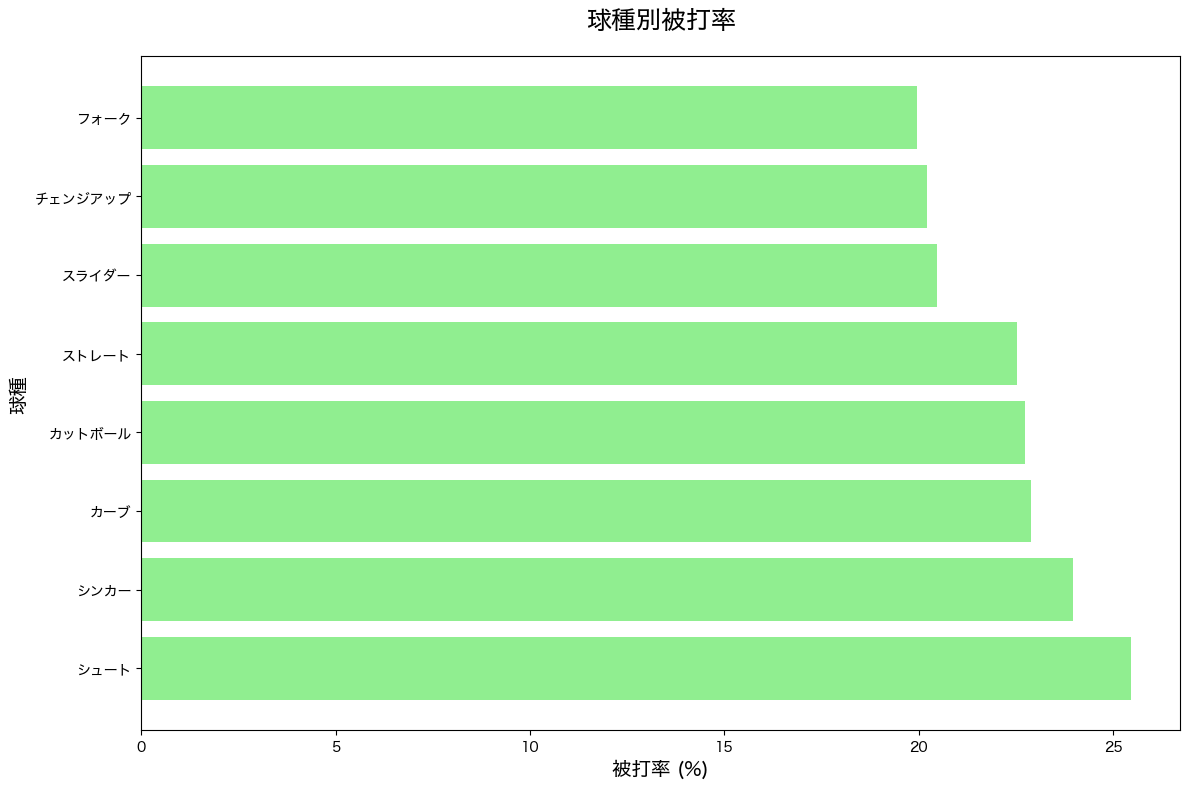

                  安打数    投球数         打率
pitch_type_name                        
シュート             1240   4873  25.446337
シンカー              189    789  23.954373
カーブ               743   3248  22.875616
カットボール           1394   6136  22.718383
ストレート            6045  26850  22.513966
スライダー            1740   8500  20.470588
チェンジアップ           946   4678  20.222317
フォーク             1741   8731  19.940442


In [6]:
pitch_data = play_info[['pitch_type_name', 'pa_result']].dropna()
pitch_data['is_hit'] = pitch_data['pa_result'].str.contains('安|２|３|本', na=False)

pitch_hit_rate = pitch_data.groupby('pitch_type_name').agg({
    'is_hit': ['sum', 'count']
})
pitch_hit_rate.columns = ['安打数', '投球数']
pitch_hit_rate['打率'] = (pitch_hit_rate['安打数'] / pitch_hit_rate['投球数'] * 100)
pitch_hit_rate = pitch_hit_rate[pitch_hit_rate['投球数'] > 500].sort_values('打率', ascending=False)

plt.figure(figsize=(12,8))
plt.barh(pitch_hit_rate.index, pitch_hit_rate['打率'], color='lightgreen')
plt.title('球種別被打率', fontsize=18, pad=20)
plt.xlabel('被打率 (%)', fontsize=14)
plt.ylabel('球種', fontsize=14)
plt.tight_layout()
plt.show()

print(pitch_hit_rate)


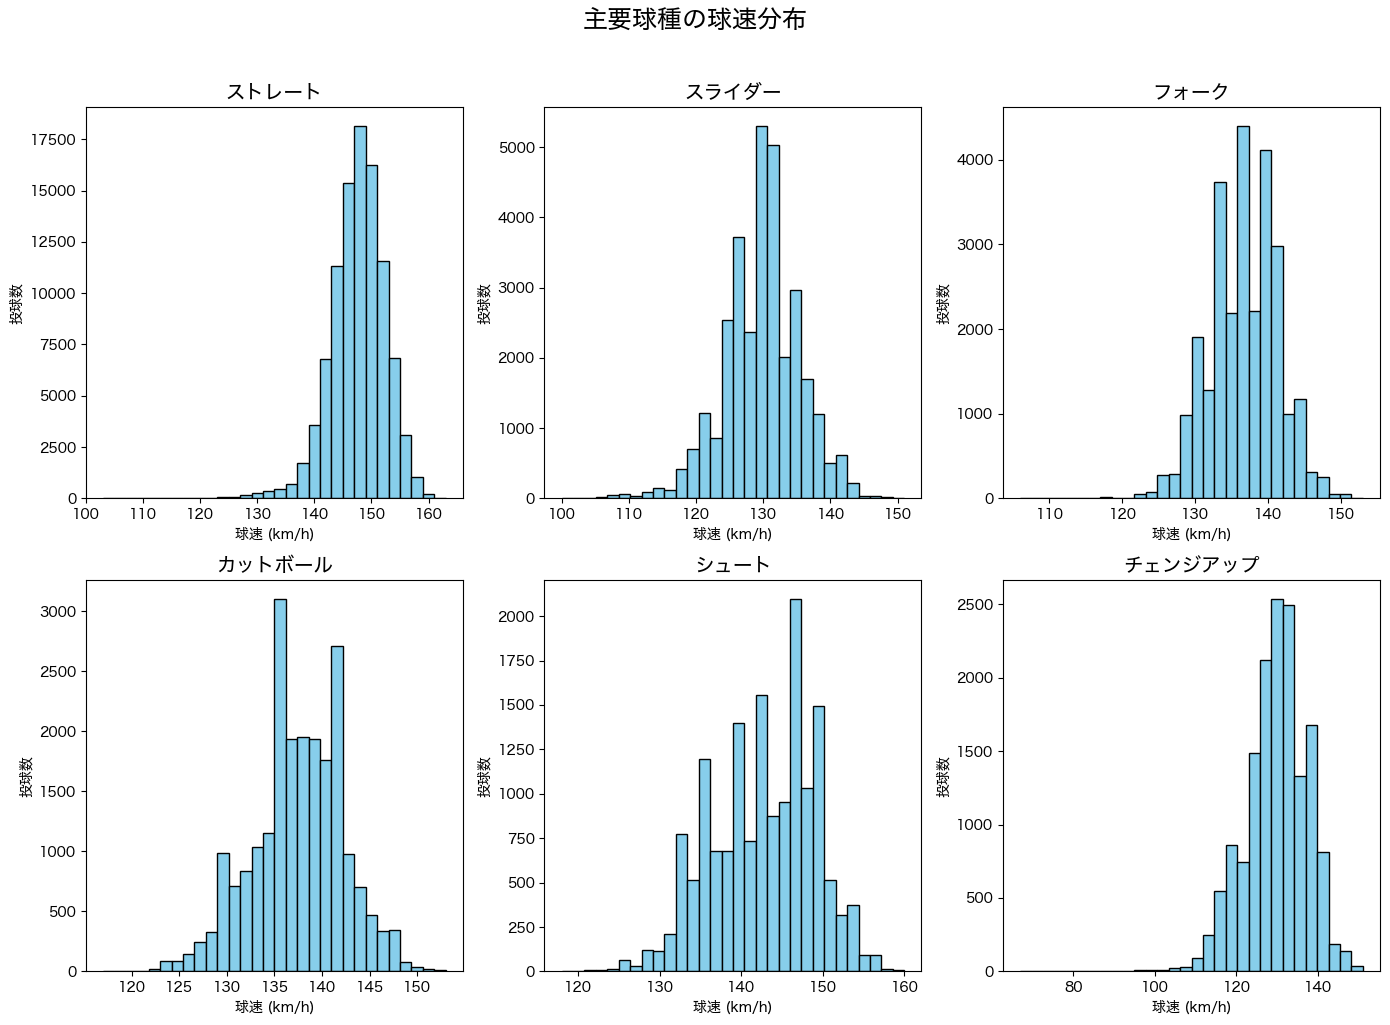

In [7]:
top_pitches = play_info['pitch_type_name'].value_counts().head(6).index

plt.figure(figsize=(14,10))
for i, pitch in enumerate(top_pitches, 1):
    plt.subplot(2, 3, i)
    pitch_subset = play_info[play_info['pitch_type_name'] == pitch]
    plt.hist(pitch_subset['pitch_speed'].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'{pitch}', fontsize=14)
    plt.xlabel('球速 (km/h)', fontsize=10)
    plt.ylabel('投球数', fontsize=10)

plt.suptitle('主要球種の球速分布', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()


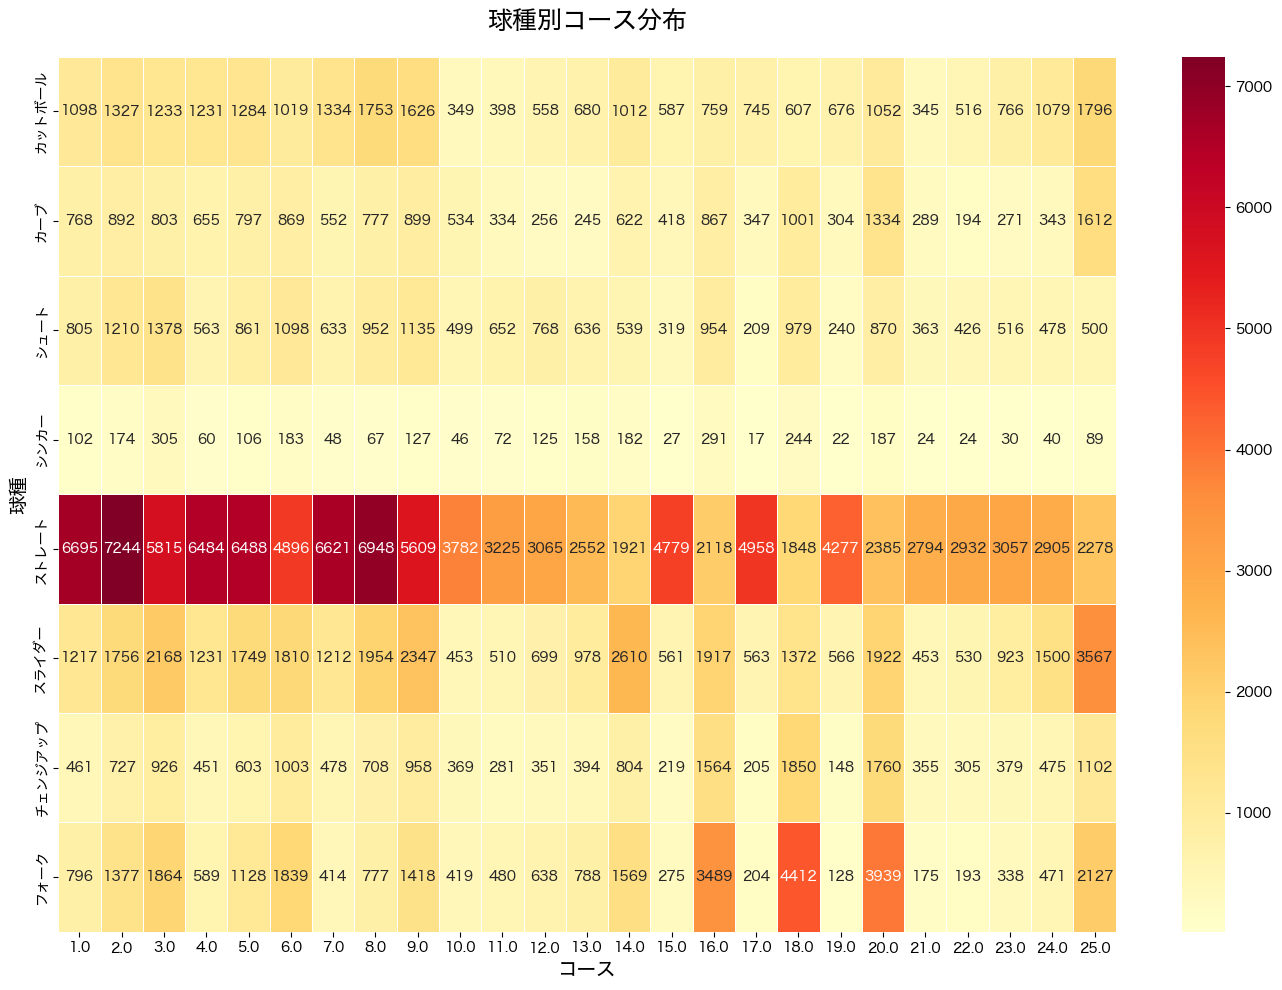

In [8]:
pitch_zone = play_info.groupby(['pitch_type_name', 'pitch_zone']).size().unstack(fill_value=0)
pitch_zone = pitch_zone[pitch_zone.sum(axis=1) > 1000]

plt.figure(figsize=(14,10))
sns.heatmap(pitch_zone, annot=True, fmt='d', cmap='YlOrRd', linewidths=0.5)
plt.title('球種別コース分布', fontsize=18, pad=20)
plt.xlabel('コース', fontsize=14)
plt.ylabel('球種', fontsize=14)
plt.tight_layout()
plt.show()
